In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../Data/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Exited'])
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [15]:
model = Sequential()

model.add(Dense(11, activation="relu", input_dim=11)) # 1st hidden layer
model.add(Dense(11, activation="relu")) # 2nd hidden layer
model.add(Dense(1, activation="sigmoid")) # Output layer

C:\Users\Shivansh Gupta\OneDrive\Desktop\Data Science\My Data Science\Deep-Learning\dl\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=['accuracy'])

In [18]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7628 - loss: 0.5347 - val_accuracy: 0.7994 - val_loss: 0.4727
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8000 - loss: 0.4554 - val_accuracy: 0.8131 - val_loss: 0.4347
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8077 - loss: 0.4320 - val_accuracy: 0.8275 - val_loss: 0.4175
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8186 - loss: 0.4195 - val_accuracy: 0.8363 - val_loss: 0.4077
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8280 - loss: 0.4085 - val_accuracy: 0.8419 - val_loss: 0.3977
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8392 - loss: 0.3964 - val_accuracy: 0.8469 - val_loss: 0.3872
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8453 - loss: 0.3836 - val_accuracy: 0.8500 - val_loss: 0.3759
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8489 - loss: 0.3719 - val_accu

In [19]:
model.layers[0].get_weights()

[array([[ 0.02068566,  0.03426275,  0.13875142,  0.17999883, -0.28967193,
          0.15422912,  0.06774598, -0.0753873 , -0.3678965 , -0.38840973,
         -0.07019789],
        [-0.63040346,  0.06149525,  0.02587632,  0.6373828 ,  0.8189756 ,
         -0.7971676 ,  0.53753906, -1.0024353 , -0.03844835, -0.09978736,
          0.27267268],
        [ 0.20976506,  0.219342  ,  0.07355306, -0.00763958, -0.05856839,
         -0.35200596, -0.00357102, -0.16631603, -0.3375614 ,  0.12602736,
         -0.07536379],
        [ 0.17930429,  0.15795457, -1.2484578 , -0.18197979, -0.22785793,
         -0.18243313,  0.00895271, -0.0462402 ,  0.37025014, -0.9152588 ,
          0.01852278],
        [-0.03504599,  0.15132342, -0.57346493,  0.09129255,  1.5755521 ,
          0.22567116, -1.103847  ,  0.16909891,  0.03282531,  0.21922767,
          1.1457772 ],
        [-0.06941742,  0.04208258, -0.1918998 ,  0.22943753, -0.04160277,
         -0.3109327 , -0.09058626,  0.10136753,  0.8474653 , -0.1408707

In [20]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step


In [21]:
y_pred = np.where(y_log>0.5, 1, 0)

In [22]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], shape=(2000, 1))

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8535

In [24]:
import matplotlib.pyplot as plt

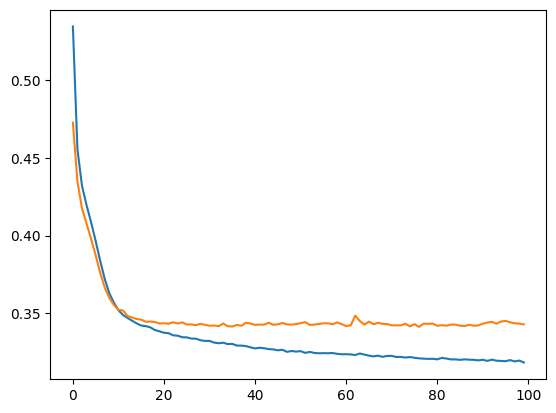

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

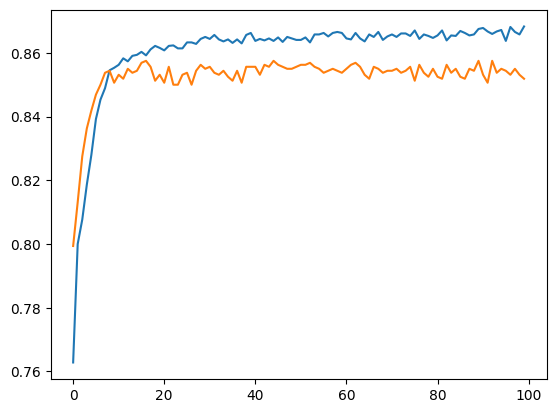

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])